# Context

Steel Casting is a manufacturing process in which a liquid molten is poured into a mould with a hollow cavity of the desired shape, and is then allowed to solidify. Casting defects are an undesired irregularity in metal casting process.
Defects include blow holes, pinholes, burr, shrinkage, mould material defects, pouring metal defects, metallurgical defects.

Traditionally, quality management for these errors are carried out manually, making the process time consuming and labour intensive. The human factor also adds an element of subjectivity which can translate into false positives and false negatives. However, machine learning can be employed to facilitate effective quality inspection.

# Data

The dataset contains 7348 images of impellers for submersible pumps sized 300x300 pixels. There are two classes of images: defective and optimal. 

# Methodology

This is a binary classification problem. This notebook will deploy a convolutional neural network to accurately classify defective and optimal impellers.

# 1) Import Libraries & Data

In [3]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from tensorflow.keras import layers
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [4]:
# The GPU is up and running !
GPU = tf.config.experimental.list_physical_devices('GPU')
print("Graphics Processing Unit: ", len(GPU))

Graphics Processing Unit:  1


In [22]:
# Training, validation and test set directories
train_path = r'C:\Users\WALEED AMJAD ALI\Desktop\Data_Science\Datasets\casting_data\casting_data\train\New folder\train'
test_path = r'C:\Users\WALEED AMJAD ALI\Desktop\Data_Science\Datasets\casting_data\casting_data\train\New folder\test'
validation_path = r'C:\Users\WALEED AMJAD ALI\Desktop\Data_Science\Datasets\casting_data\casting_data\train\New folder\validation'

Found 5000 files belonging to 2 classes.


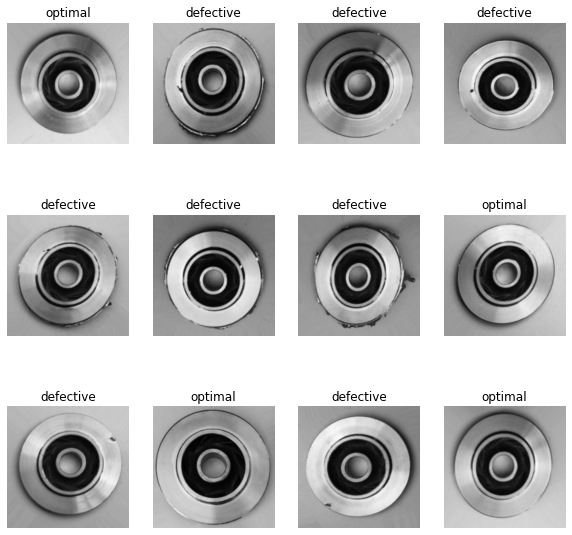

In [56]:
# Lets Plot some images
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_path)
plt.figure(figsize=(10,10))
for images, labels in train_data.take(1):
    for i in range(0,12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype('uint8')))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")

# 2) Data Preprocessing

In [7]:
# Image Data Generator to perform data augmentation.
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale= 1.0 / 255.0)

validation_gen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale= 1.0/ 255.0)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255)

In [8]:
# Call Keras's flow from directory method and pass the data generators
train_data = train_gen.flow_from_directory(
    train_path,
    target_size = (300, 300),
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True
)

validation_data = validation_gen.flow_from_directory(
    validation_path,
    target_size = (300, 300),
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True
)


test_data = test_gen.flow_from_directory(
    test_path,
    target_size = (300, 300),
    class_mode = 'binary',
    batch_size = 32,
    shuffle = False
)

Found 5000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1100 images belonging to 2 classes.


# 3) Model Preprocessing

In [58]:
# Model contains 3 convolutional layers followed by maxpooling.
model = Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(300,300,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    Flatten(),
    Dense(units=1, activation='sigmoid')
])

model.summary()


# Compiling model with the adam optimizer.
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)            

# 4) Model Training

In [11]:
# Train the model.
model.fit(x=train_data,
          validation_data = validation_data,
          epochs = 15,
          verbose = 2,
         callbacks = [
    tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 2,
    restore_best_weights = True)])  

Epoch 1/15
157/157 - 29s - loss: 0.6106 - accuracy: 0.6598 - val_loss: 0.5479 - val_accuracy: 0.7550
Epoch 2/15
157/157 - 23s - loss: 0.4797 - accuracy: 0.7686 - val_loss: 0.5034 - val_accuracy: 0.7720
Epoch 3/15
157/157 - 24s - loss: 0.3852 - accuracy: 0.8336 - val_loss: 0.3416 - val_accuracy: 0.8670
Epoch 4/15
157/157 - 24s - loss: 0.3215 - accuracy: 0.8692 - val_loss: 0.3003 - val_accuracy: 0.8920
Epoch 5/15
157/157 - 24s - loss: 0.2757 - accuracy: 0.9002 - val_loss: 0.4844 - val_accuracy: 0.7350
Epoch 6/15
157/157 - 24s - loss: 0.2686 - accuracy: 0.8922 - val_loss: 0.2382 - val_accuracy: 0.9290
Epoch 7/15
157/157 - 24s - loss: 0.2182 - accuracy: 0.9300 - val_loss: 0.2232 - val_accuracy: 0.9240
Epoch 8/15
157/157 - 24s - loss: 0.2122 - accuracy: 0.9258 - val_loss: 0.1972 - val_accuracy: 0.9500
Epoch 9/15
157/157 - 24s - loss: 0.1791 - accuracy: 0.9482 - val_loss: 0.1683 - val_accuracy: 0.9700
Epoch 10/15
157/157 - 24s - loss: 0.1682 - accuracy: 0.9504 - val_loss: 0.1824 - val_accura

# 5) Model Evaluation

In [12]:
true_labels = test_data.labels
predicted_labels = np.squeeze(np.array(model.predict(test_data) >= 0.5, dtype= np.int))
cm = confusion_matrix(true_labels, predicted_labels)
cm

array([[598,   2],
       [ 39, 461]], dtype=int64)

In [13]:
def model_evaluation(model, test_data):
    
    y_pred = np.squeeze((model.predict(test_data) >= 0.5).astype(np.int))
    cm = confusion_matrix(test_data.labels, y_pred)
    names = ['True Neg','False Pos','False Neg','True Pos']
    count = ["{0:0.2f}".format(value) for value in cm.flatten()]
    percentages = ["{0:5%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,count,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    

    plt.figure(figsize=(7, 7))
    sns.heatmap(cm, annot=labels, fmt='', vmin=0, cmap='Greens', cbar=False)
    plt.xticks(ticks=np.arange(2) + 0.5, labels=["Optimal", "Defective"])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=["Optimal", "Defective"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    
    clr = classification_report(test_data.labels, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    print("Classification Report:\n-------------------\n", clr)

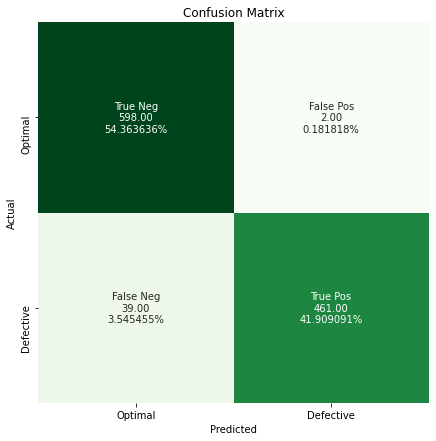

Classification Report:
-------------------
               precision    recall  f1-score   support

    NEGATIVE       0.94      1.00      0.97       600
    POSITIVE       1.00      0.92      0.96       500

    accuracy                           0.96      1100
   macro avg       0.97      0.96      0.96      1100
weighted avg       0.96      0.96      0.96      1100



In [14]:
model_evaluation(model, test_data)